In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from src.vols.constant_vol import *
from src.gans.ivgan import IVGan
from src.networks.ffn import FFNetwork
from src.utils import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
set_plot_params()

In [421]:
N_paths = 100000
total_timesteps = 60*60*7.5 #1 second data
n_timesteps = 60 #train at 1 min interval

vol_model = ConstantVol(sigma=0.19)
spots, vols = vol_model.generate(N_paths, total_timesteps, n_timesteps, reshape_for_rnn=True)

In [446]:
generator = FFNetwork(n_layers=3, h_dims=32, loss=None, batch_norm = True, lr=0.00001)
discriminator = FFNetwork(n_layers=3, h_dims=32, loss=None,  batch_norm = True, lr=0.00002)

In [447]:
gan = IVGan(discriminator, generator)

Epoch 1 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

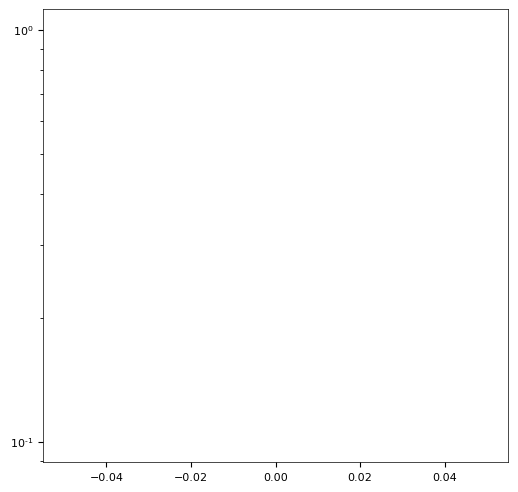

Epoch 2 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

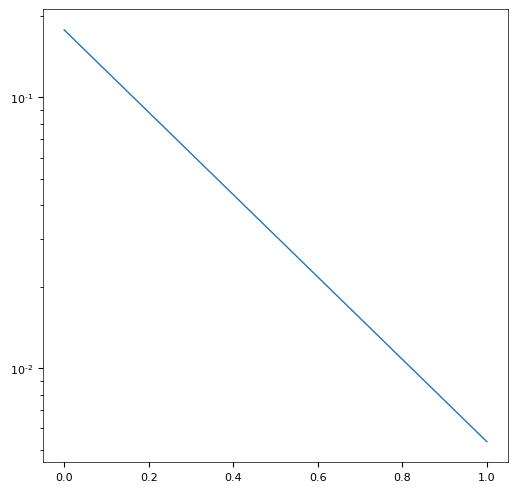

Epoch 3 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

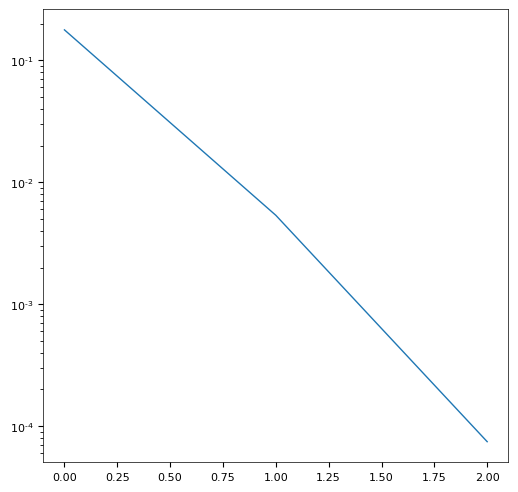

Epoch 4 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

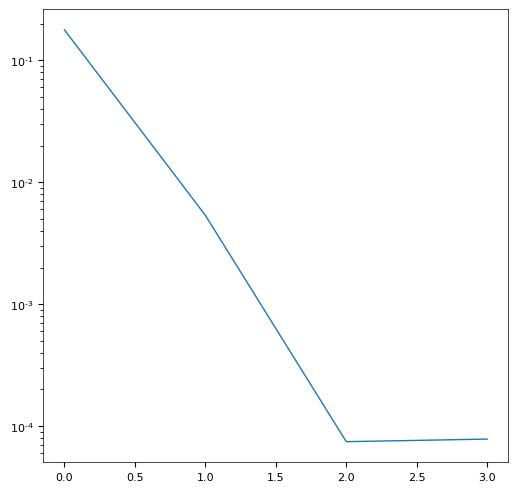

Epoch 5 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

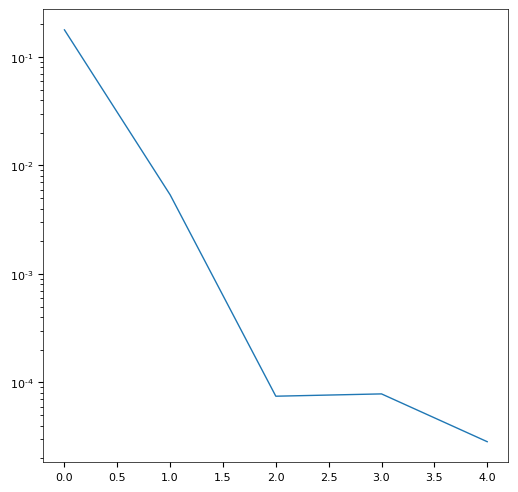

Epoch 6 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

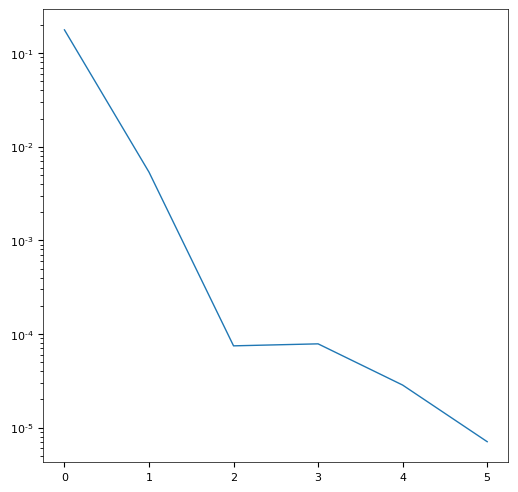

Epoch 7 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

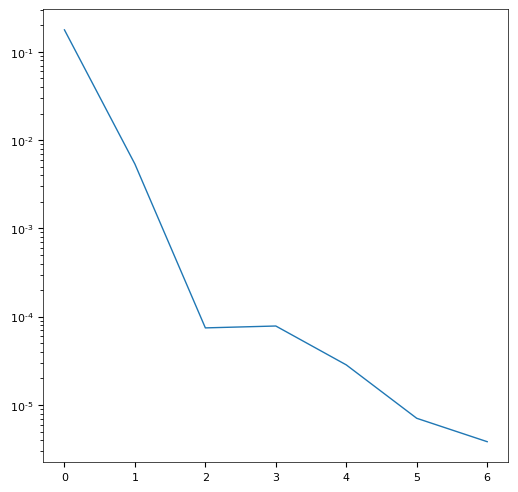

Epoch 8 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

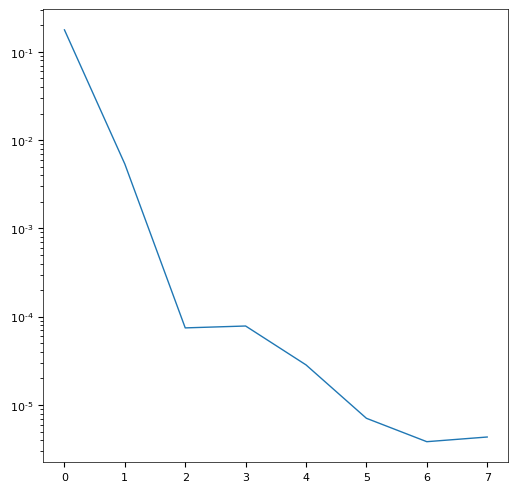

Epoch 9 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

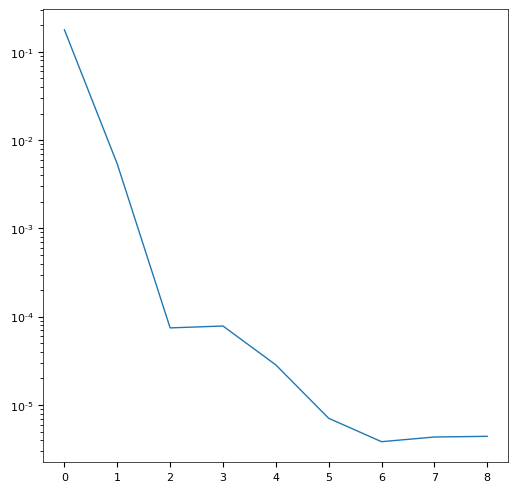

Epoch 10 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

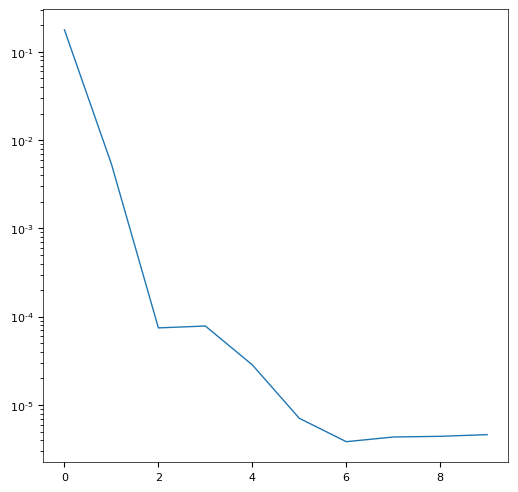

Epoch 11 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

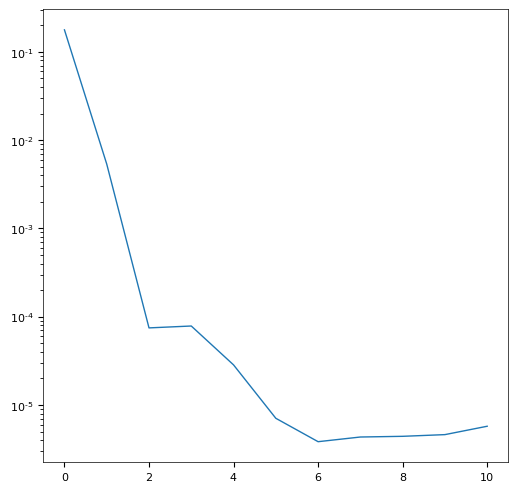

Epoch 12 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

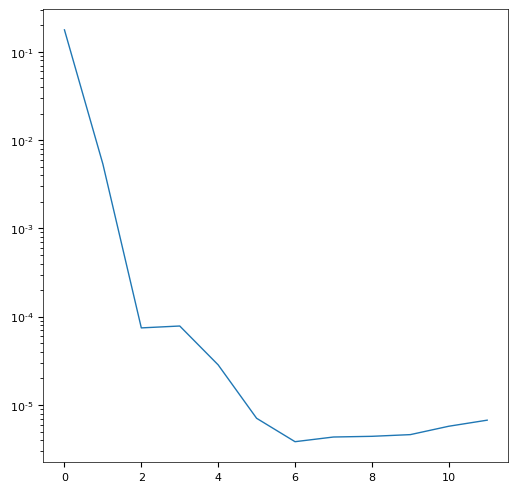

Epoch 13 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

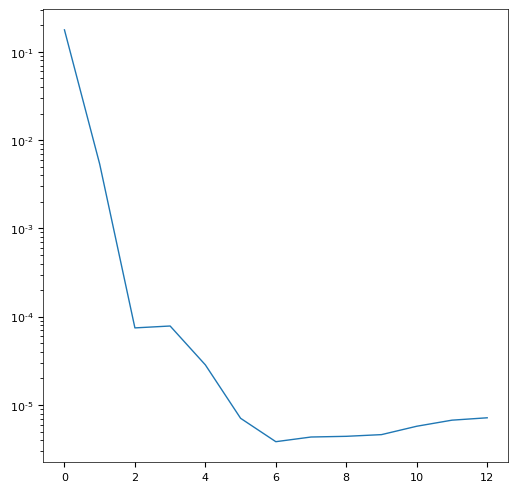

Epoch 14 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

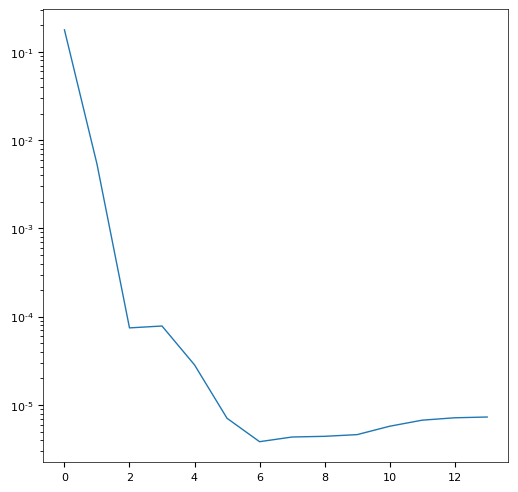

Epoch 15 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

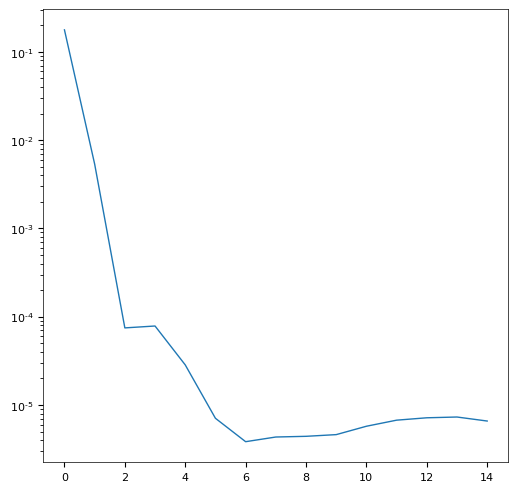

Epoch 16 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

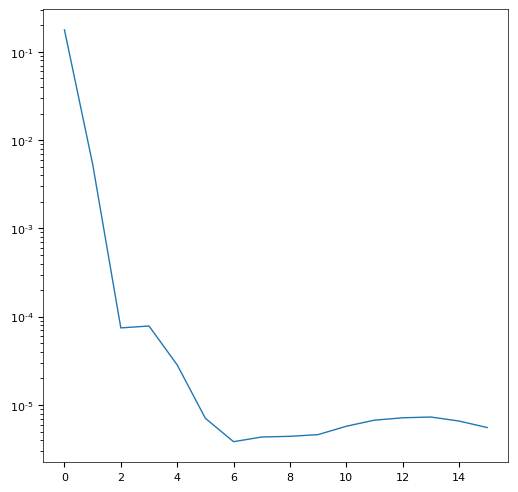

Epoch 17 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

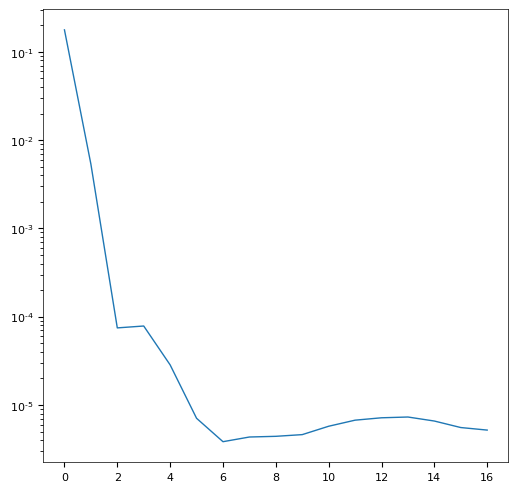

Epoch 18 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

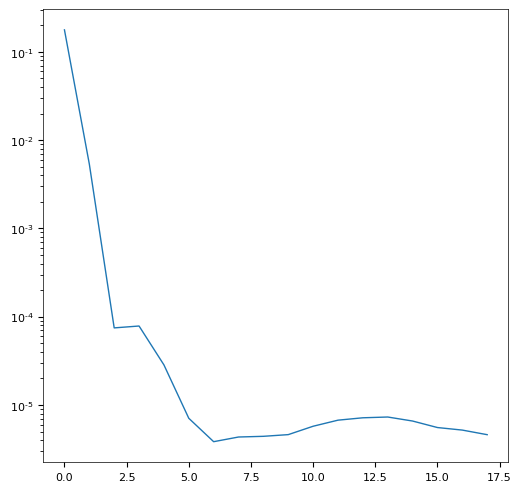

Epoch 19 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

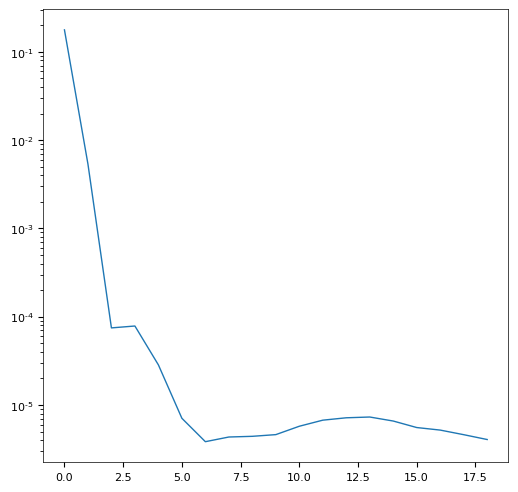

Epoch 20 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

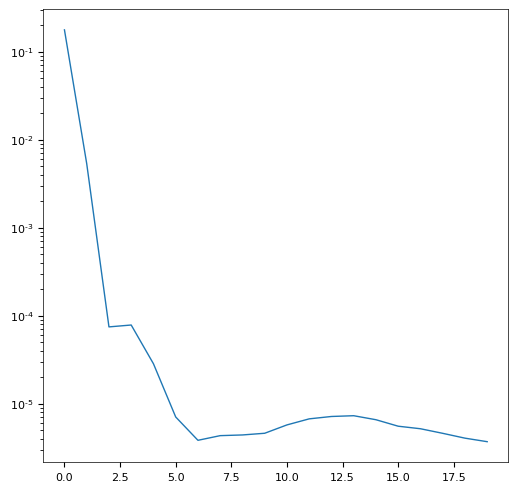

Epoch 21 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

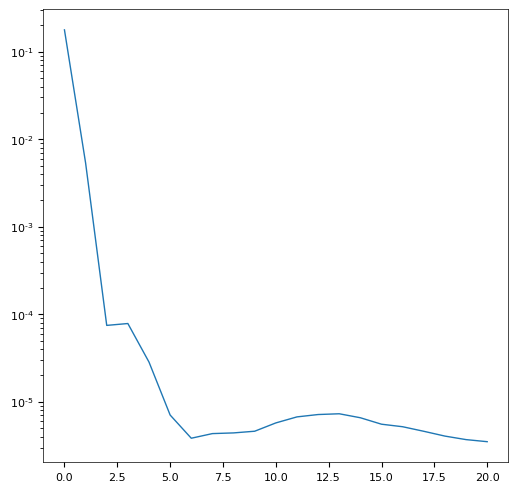

Epoch 22 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

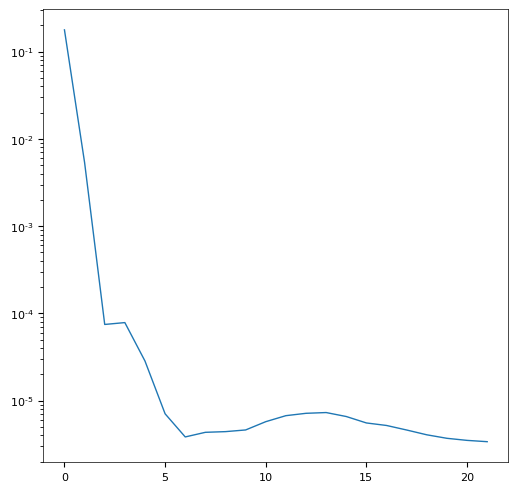

Epoch 23 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

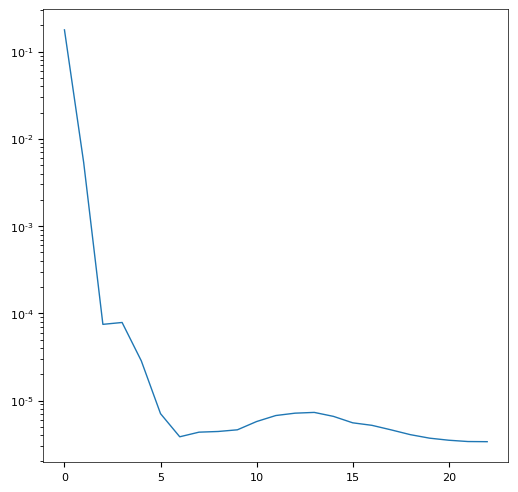

Epoch 24 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

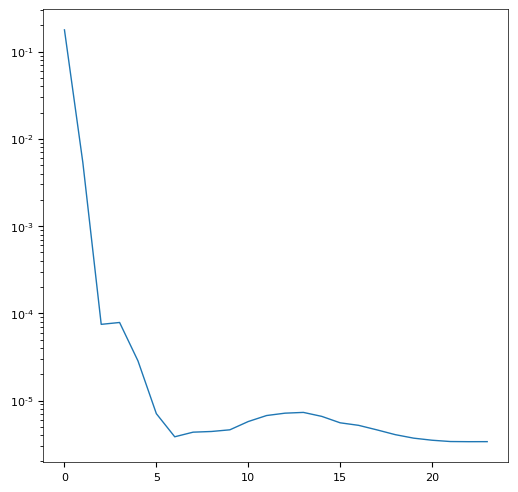

Epoch 25 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

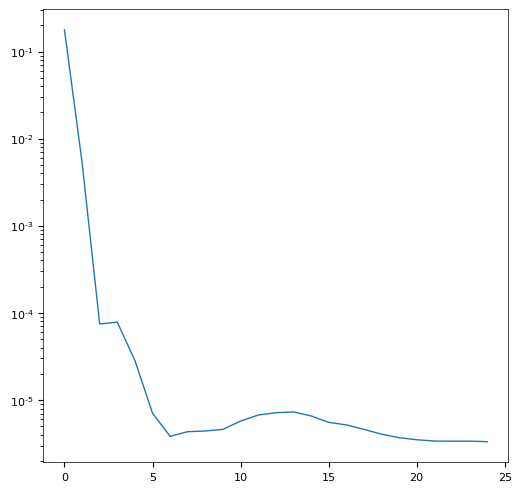

Epoch 26 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

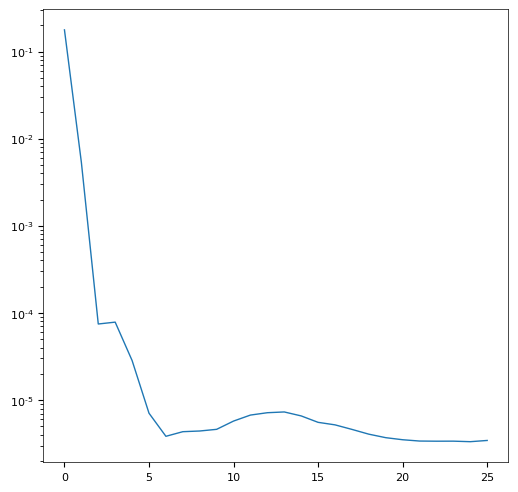

Epoch 27 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

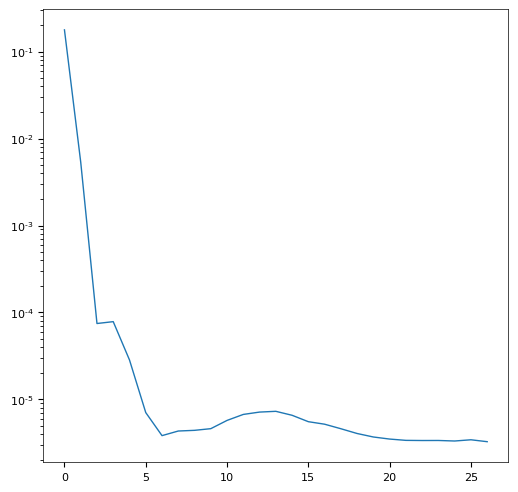

Epoch 28 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

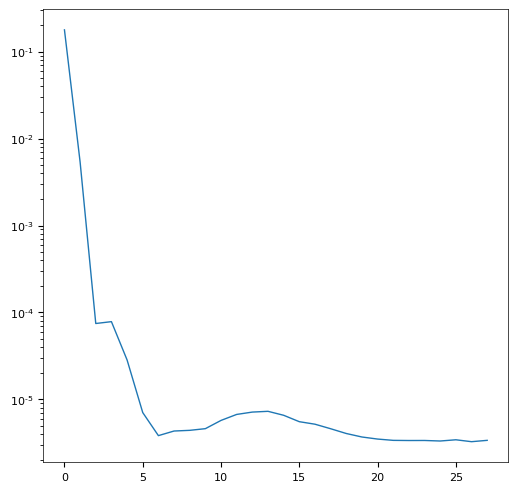

Epoch 29 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

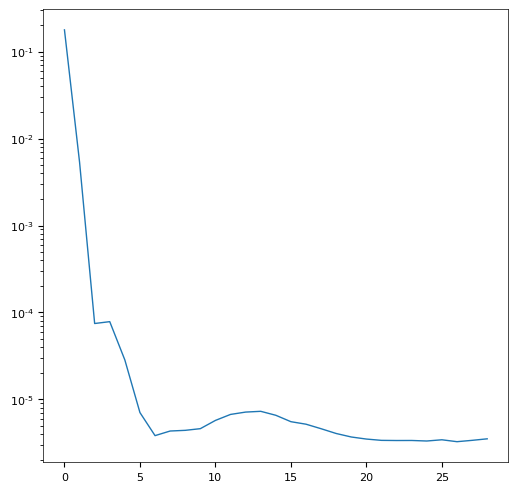

Epoch 30 of 30:   0%|          | 0/378 [00:00<?, ?it/s]

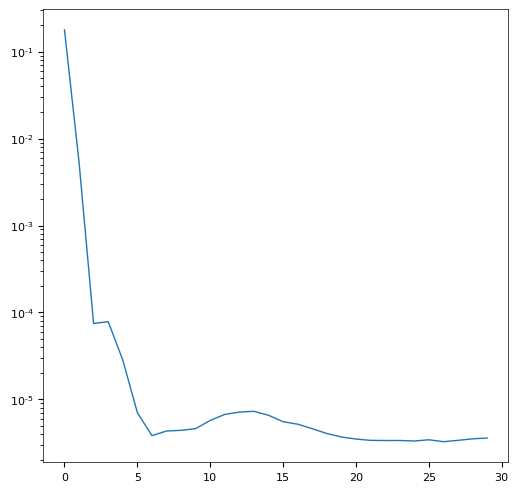

In [448]:
result = gan.train(x_train=spots.squeeze(-1),
        true_sample=np.random.normal(size=(N_paths, 1)),
        num_epochs=30,
        batch_size=264,
        clip=0.5,
        num_critic=5,
        show_hist=False,
        show_rmse = True,
        vol_model = vol_model
)

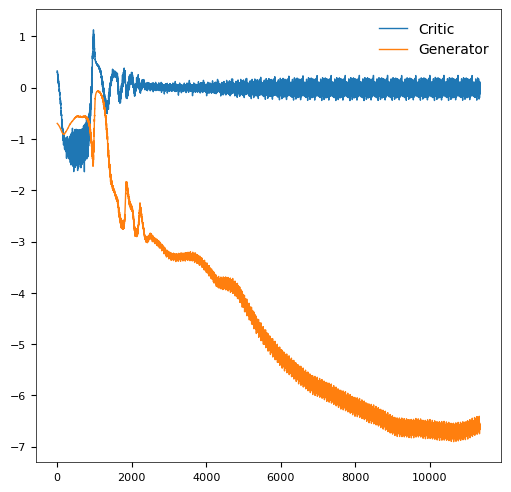

In [449]:
plt.plot(result['critic_loss'],label="Critic")
plt.plot(result['generator_loss'],label="Generator")
plt.legend()

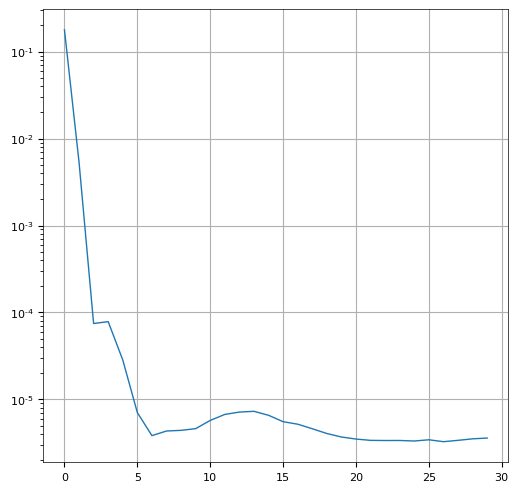

In [452]:
plt.plot(result['RMSE'],label="Generator")
plt.yscale("log")
plt.grid()

In [453]:
spots_test, vols_test = vol_model.generate(10000, total_timesteps, n_timesteps)
iv = generator.predict_iv(spots_test)
true_iv = np.sum(vols_test**2/total_timesteps, axis=1)

In [454]:
iv

array([8.4835505e-05, 7.6631695e-05, 7.9546822e-05, ..., 8.1006903e-05,
       8.3556399e-05, 8.2523766e-05], dtype=float32)

In [455]:
true_iv

array([8.022223e-05, 8.022223e-05, 8.022223e-05, ..., 8.022223e-05,
       8.022223e-05, 8.022223e-05], dtype=float32)

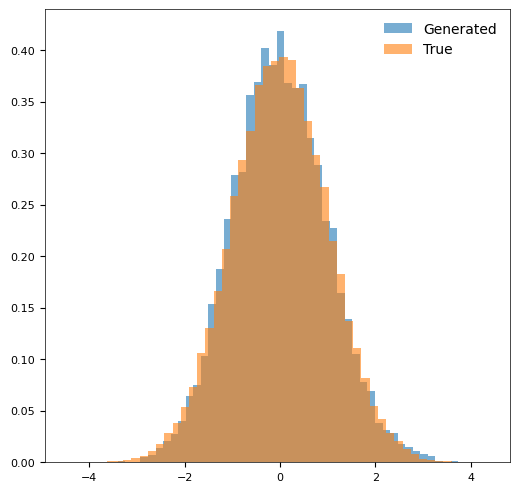

In [456]:
plt.hist((spots_test[:,-1] - spots_test[:,0])/np.sqrt(iv),alpha=0.6,bins=50, density=True,label="Generated")
plt.hist(np.random.normal(size=N_paths), bins=50, alpha=0.6, density=True,label="True")
plt.legend()
plt.show()

In [426]:
np.mean(iv)

8.1817474e-05

In [427]:
np.mean(true_iv)

8.022223e-05